In [691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [692]:
df = pd.read_csv('ds_salaries.csv',sep=',', usecols=('work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 
'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'))

In [693]:
df = df.drop_duplicates()

In [694]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [695]:
[df['experience_level'].unique(),
df['work_year'].unique(),
df['employment_type'].unique(),
df['job_title'].unique(),
df['salary_currency'].unique(),
df['company_size'].unique()]

[array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 array([2020, 2021, 2022]),
 array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 array(['Data Scientist', 'Machine Learning Scientist',
        'Big Data Engineer', 'Product Data Analyst',
        'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
        'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
        'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
        'Director of Data Science', 'Research Scientist',
        'Machine Learning Manager', 'Data Engineering Manager',
        'Machine Learning Infrastructure Engineer', 'ML Engineer',
        'AI Scientist', 'Computer Vision Engineer',
        'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
        '3D Computer Vision Researcher', 'Data Analytics Engineer',
        'Applied Data Scientist', 'Marketing Data Analyst',
        'Cloud Data Engineer', 'Financial Data Analyst',
        'Computer Vision Software Engineer

### Question 1: Who earns the most from data science in 2022?

<BarContainer object of 33 artists>

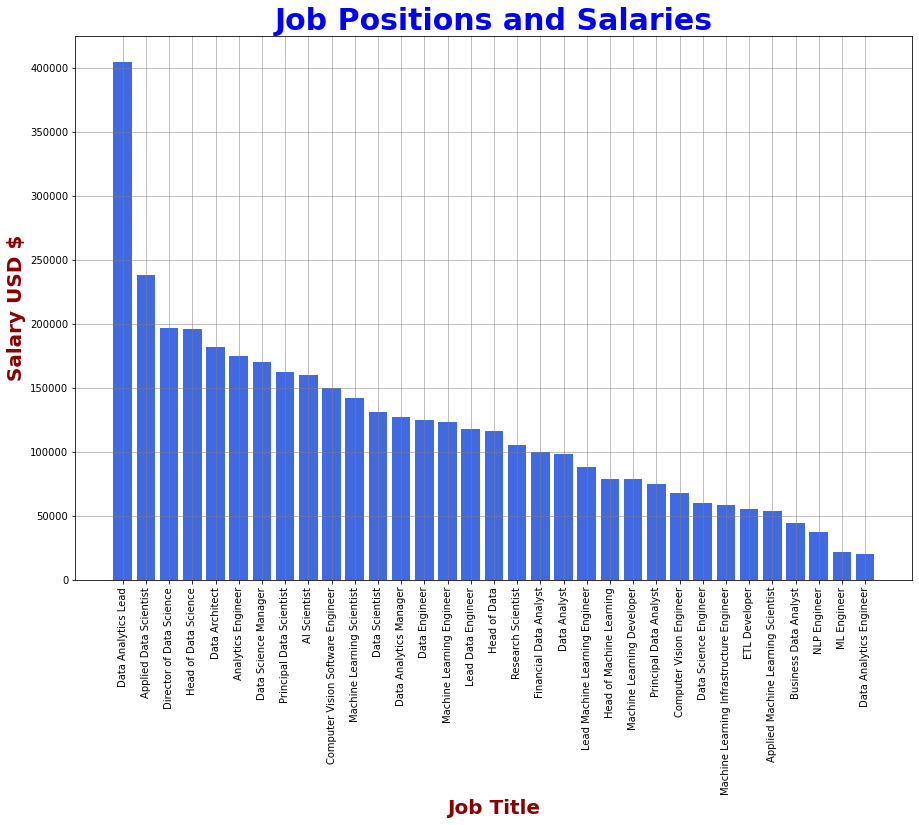

In [696]:
dsYear2022 = df[df['work_year'] == 2022]
# dsYear2022.info()
dsEarn2022 = dsYear2022.groupby(by= 'job_title').mean().sort_values(by= 'salary_in_usd', ascending= False).round()
dsEarn2022.reset_index(inplace=True)
from turtle import color
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.title('Job Positions and Salaries', fontsize=30, color='blue', fontweight='bold')
plt.ylabel('Salary USD $', fontsize = 20, color = 'darkred', fontweight='bold')
plt.xlabel('Job Title', fontsize = 20, color = 'darkred', fontweight='bold')
plt.bar(x= dsEarn2022['job_title'],height = dsEarn2022['salary_in_usd'], color='royalblue')

#first top:
# 1. Data Analytics Lead
# 2. Applied Data Scientist
# 3. Director of Data Science


### Question 2: How the salaries changed in positions: Data Engineer, Data Analyst, Data Scientist from 2020 to 2022?

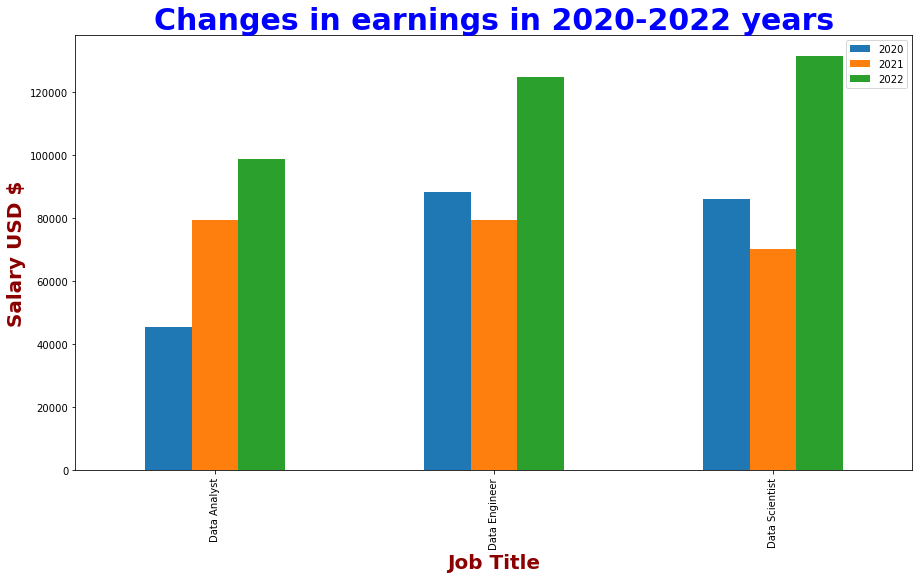

In [697]:
salariesChanged = df.groupby(by = ['job_title','work_year'], as_index=True).mean()
salariesPositions = salariesChanged.loc[['Data Engineer','Data Analyst','Data Scientist']] # If we have a groupby, the best way to find a data is use loc with double [[data]]
del salariesPositions['salary'], salariesPositions['remote_ratio']

salariesPositions = salariesPositions.reset_index()
salariesPositions.pivot(index = 'job_title', columns = 'work_year', values = 'salary_in_usd').plot(kind = 'bar',figsize = (15,8))

plt.xlabel('Job Title',fontsize = 20, color = 'darkred', fontweight = 'bold')
plt.ylabel('Salary USD $',fontsize = 20, color = 'darkred', fontweight = 'bold')
plt.title('Changes in earnings in 2020-2022 years',fontsize=30, color='blue', fontweight='bold')
plt.legend(loc= 'upper right')
plt.show()


### Question 3: What type of employment contract is the most popular?

Text(0.5, 1.0, 'The popularity of the type of employment contract')

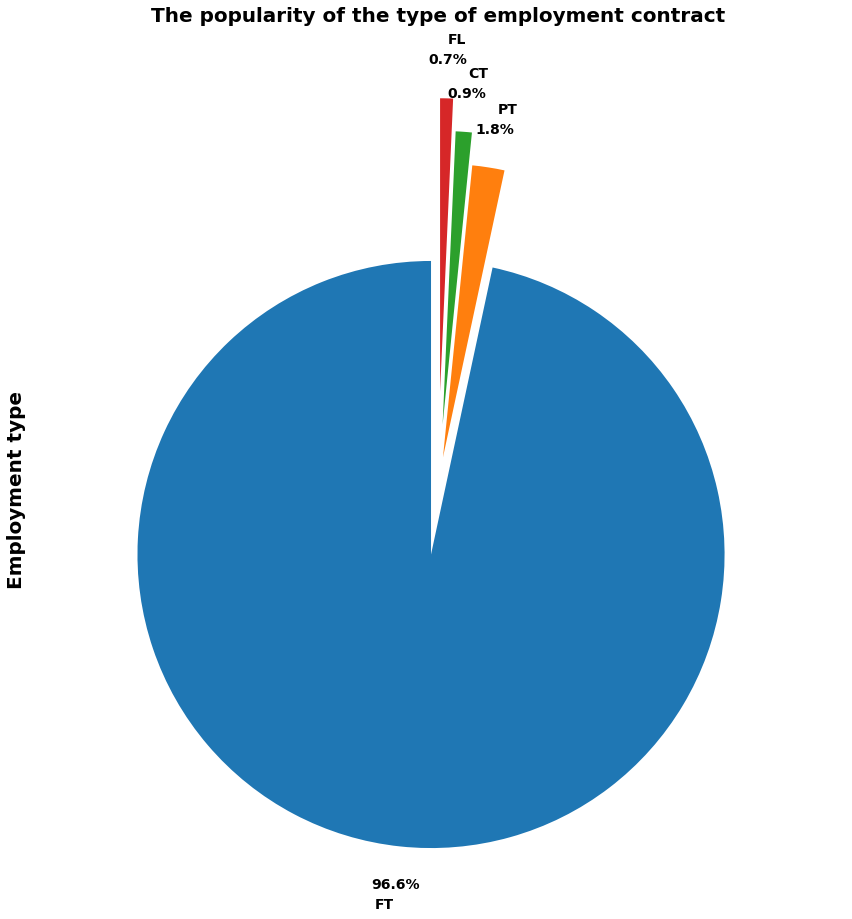

In [698]:
employContract = df['employment_type'].value_counts()
explode = [0.2, 0.1, 0.2, 0.3]
employContract.plot.pie(figsize = (20,15),autopct='%0.1f%%',shadow=False, radius=0.9,startangle=90, explode=explode, pctdistance=1.13, labeldistance=1.2,textprops={'fontsize': 14,'fontweight' :'bold'})

plt.ylabel('Employment type',fontsize = 20, color = 'black', fontweight = 'bold')
plt.title('The popularity of the type of employment contract', pad= 60, fontsize = 20, fontweight = 'bold')

# FT is the most popular type of employment contract. 

### Question 4: What is the most experience level of professional experience?

Text(0.5, 1.0, 'Levels of professional experience')

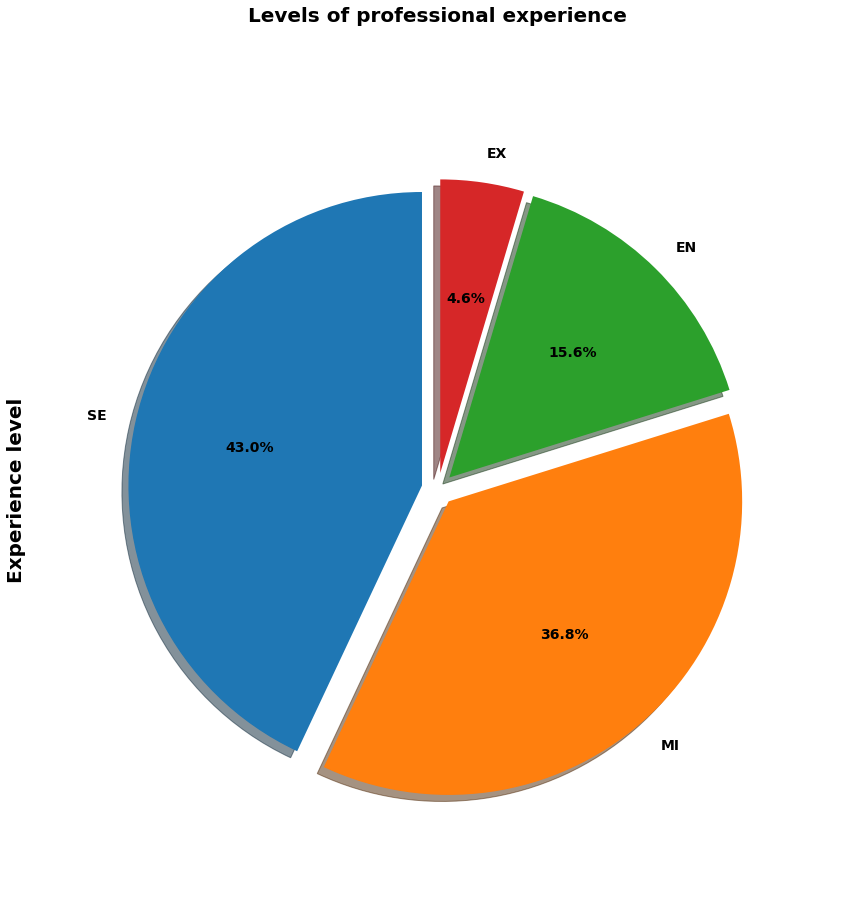

In [699]:
experienceLevel = df['experience_level'].value_counts()
explode1 = [0.05, 0.05, 0.05, 0.05]
experienceLevel.plot.pie(figsize = (20,15),autopct='%0.1f%%',shadow=True, radius=0.9,startangle=90, explode=explode1,textprops={'fontsize': 14,'fontweight' :'bold'})

plt.ylabel('Experience level',fontsize = 20, color = 'black', fontweight = 'bold')
plt.title('Levels of professional experience', pad= 60, fontsize = 20, fontweight = 'bold')


### Question 5: How many people work remotely for an employer from another country?

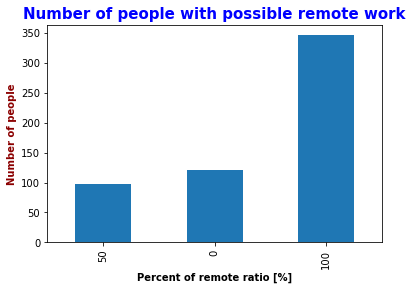

In [700]:
remoteRatio = df['remote_ratio'].value_counts().sort_values()
remoteRatio.plot.bar()

plt.xlabel('Percent of remote ratio [%]',fontsize = 10, color = 'black', fontweight = 'bold')
plt.ylabel('Number of people',fontsize = 10, color = 'darkred', fontweight = 'bold')
plt.title('Number of people with possible remote work',fontsize=15, color='blue', fontweight='bold')
plt.show()

In [701]:
anotherCountry = df[(df['remote_ratio'] == 100) & (df['employee_residence'] != df['company_location'])]
anotherCountry.count()
#answer 38 people can work remote from another country

work_year             38
experience_level      38
employment_type       38
job_title             38
salary                38
salary_currency       38
salary_in_usd         38
employee_residence    38
remote_ratio          38
company_location      38
company_size          38
dtype: int64

<AxesSubplot:>

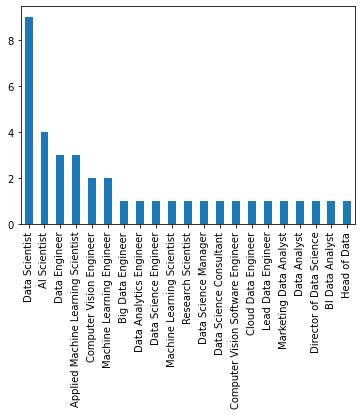

In [702]:
anotherCountry['job_title'].value_counts().plot.bar() # for me this plot 

### Question 6 (cd. Question 5): Can only large companiess afford to remote work?

<AxesSubplot:ylabel='company_size'>

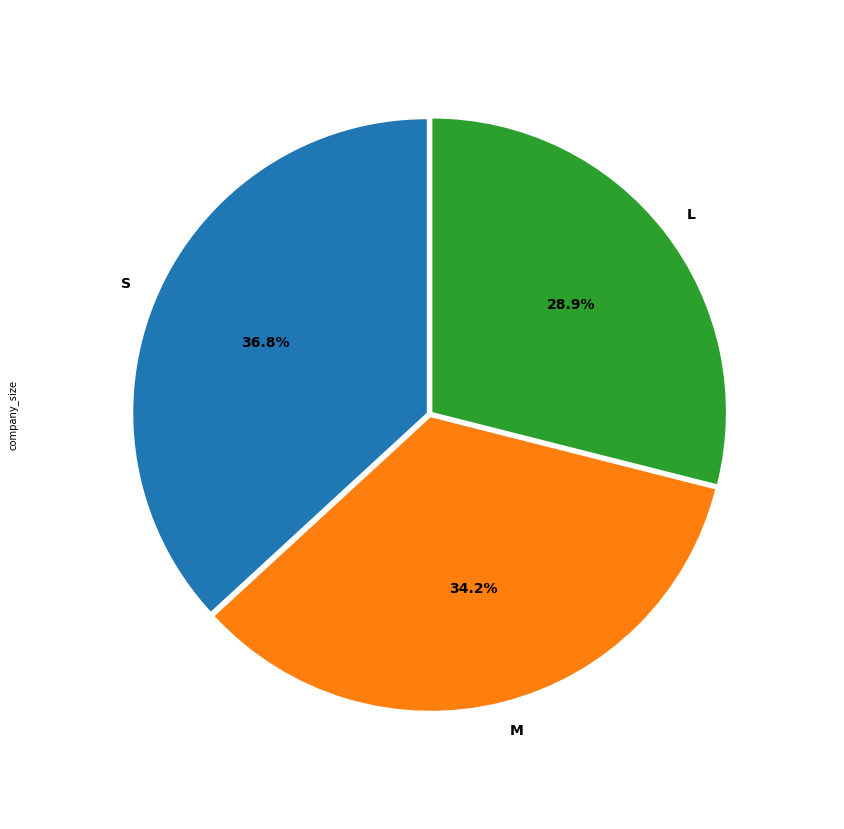

In [703]:
LargeCompany = anotherCountry[anotherCountry['company_size'] == 'L']
LargeCompany.count()

pieChartCompanies = anotherCountry['company_size'].value_counts()
explode2 = [0.01, 0.01, 0.01]
pieChartCompanies.plot.pie(figsize = (20,15),autopct='%0.1f%%',shadow=False, radius=0.9,startangle=90, explode=explode2,textprops={'fontsize': 14,'fontweight' :'bold'})

# No, it's not a problem for small, medium and large companies. The biggest number is the small companies, next is medium size companies and the last is large companies.

### Question 7: Can you predict the Data Scientist earnings?

In [704]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

DSpredcit = df[df['job_title'] == 'Data Scientist']
del DSpredcit['employment_type'], DSpredcit['salary'], DSpredcit['salary_currency'], DSpredcit['employee_residence'], DSpredcit['remote_ratio'], DSpredcit['company_location'], DSpredcit['company_size'], DSpredcit['job_title']
DSpredcit

,work_year,experience_level,salary_in_usd
0,2020,MI,79833
7,2020,MI,35735
10,2020,EN,51321
11,2020,MI,40481
12,2020,EN,39916
...,...,...,...
559,2022,SE,140400
570,2022,SE,210000
593,2022,SE,150000
598,2022,MI,160000


In [705]:
DSpredcit.loc[DSpredcit['experience_level'] == 'EN', 'experience_level'] = 0
DSpredcit.loc[DSpredcit['experience_level'] == 'MI', 'experience_level'] = 1
DSpredcit.loc[DSpredcit['experience_level'] == 'SE', 'experience_level'] = 2
DSpredcit.loc[DSpredcit['experience_level'] == 'EX', 'experience_level'] = 3
DSpredcit

,work_year,experience_level,salary_in_usd
0,2020,1,79833
7,2020,1,35735
10,2020,0,51321
11,2020,1,40481
12,2020,0,39916
...,...,...,...
559,2022,2,140400
570,2022,2,210000
593,2022,2,150000
598,2022,1,160000


In [706]:
features = ['work_year', 'experience_level']
X = DSpredcit.loc[:, features]
y = DSpredcit.loc[:, ['salary_in_usd']]


In [707]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [708]:
model = DecisionTreeRegressor(max_depth = 2, random_state=0)

In [709]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [710]:
model.predict(X_test)


array([ 67918.34210526,  67918.34210526, 159678.03333333,  95099.09090909,
       159678.03333333,  67918.34210526,  67918.34210526,  67918.34210526,
       130039.85714286,  67918.34210526,  95099.09090909,  67918.34210526,
        67918.34210526, 159678.03333333,  67918.34210526, 130039.85714286,
       159678.03333333, 159678.03333333,  67918.34210526, 159678.03333333,
       130039.85714286,  95099.09090909,  67918.34210526, 130039.85714286,
        67918.34210526,  67918.34210526, 159678.03333333, 159678.03333333,
        95099.09090909,  67918.34210526,  67918.34210526,  95099.09090909,
        67918.34210526])

In [711]:
model.predict(X_test.iloc[0].values.reshape(1,-1))

/Users/dominikgorzkowicz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([67918.34210526])

In [712]:
score = model.score(X_test, y_test)
print(score)

0.37320269358501634


In [713]:
y_salaryPredictions = model.predict(X_test)
y_test['preds'] = y_salaryPredictions
df_out = pd.merge(DSpredcit,y_test[['preds']],how = 'left',left_index = True, right_index = True)
df_out

,work_year,experience_level,salary_in_usd,preds
0,2020,1,79833,NaN
7,2020,1,35735,NaN
10,2020,0,51321,67918.342105
11,2020,1,40481,NaN
12,2020,0,39916,NaN
...,...,...,...,...
559,2022,2,140400,159678.033333
570,2022,2,210000,NaN
593,2022,2,150000,NaN
598,2022,1,160000,NaN


In [714]:
df_out.to_csv('predictDSsalaries.csv', sep='\t', header=True)